(qhw1)=
# Tutorial 1 - The qubit or  the two level system

In this first tutorial we are going to discuss the two-level system as it is the simplest unit of quantum computing systems. We discuss on a physics level with Hamiltonians etc its static properties like level splitting and avoided crossings. Then we discuss dynamical processes like Rabi oscillations and their connection to the notation of quantum computation.

This lays the basis for the discussion of quantum computation hardware in the next tutorials. Namely:

- superconducting qubits
- trapped ions
- neutral atoms

## Hamiltonian, Eigenstates and Matrix Notation

To start out, we will consider two eigenstates $|0\rangle,~|1\rangle $ of the Hamiltonian $\hat{H}_0$ with

$$
 \hat{H}_0|0\rangle=E_0|0\rangle, \qquad \hat{H}_0|1\rangle=E_1|1\rangle.
$$

Quite typically we might think of it as a two-level atom with states 0 and 1. The eigenstates can be expressed in matrix notation:

$$
 |0\rangle=\left( \begin{array}{c} 1 \\ 0 \end{array} \right), \qquad |1\rangle=\left( \begin{array}{c} 0 \\ 1 \end{array} \right),
$$

so that $\hat{H}_0$ be written as a diagonal matrix

$$
    \hat{H}_0 = \left(\begin{array}{cc} E_0 & 0 \\ 0 & E_1 \end{array}\right).
$$

If we would only prepare eigenstates the system would be rather boring. However, we typically have the ability to change the Hamiltonian by switching on and off laser or microwave fields. We can then write the Hamiltonian in its most general form as:

$$
\hat{H} = \frac{\hbar}{2}\left( \begin{array}{cc} \Delta  & \Omega_x - i\Omega_y\\ \Omega_x +i\Omega_y & -\Delta \end{array} \right)
$$

Sometimes we will also chose the definition:

$$
\Omega = |\Omega| e^{i\varphi}=\Omega_x + i\Omega_y
$$

It is particularly useful for the case in which the coupling is created by a laser. Another useful way of thinking about the two-level system is as a spin in a magnetic field. Let us remind us of the definitions of the of the spin-1/2 matrices:

$$
s_x = \frac{\hbar}{2}\left(\begin{array}{cc}
0 & 1\\
1 &  0
\end{array}
\right)~
s_y = \frac{\hbar}{2}\left(\begin{array}{cc}
0 & -i\\
i &  0
\end{array}
\right)~s_z =\frac{\hbar}{2} \left(\begin{array}{cc}
1 & 0\\
0 &  -1
\end{array}
\right)
$$

We then obtain:

$$%\label{Eq:HamSpin}
\hat{H} = \mathbf{B}\cdot\hat{\mathbf{s}}\text{ with }\mathbf{B} = (\Omega_x, \Omega_y, \Delta)
$$

You will go through this calculation in the excercise of this week.

## Case of no perturbation $\Omega = 0$

This is exactly the case of no applied laser fields that we discussed previously. We simply removed the energy offset $E_m = \frac{E_0+E_1}{2}$ and pulled out the factor $\hbar$, such that $\Delta$ measures a frequency. So we have:

$$
E_0 = E_m+ \frac{\hbar}{2}\Delta\\
E_1 = E_m- \frac{\hbar}{2}\Delta
$$

We typically call $\Delta$ the energy difference between the levels or the *detuning*.

## Case of no detuning $\Delta = 0$

Let us suppose that the diagonal elements are exactly zero. And for simplicity we will also keep $\Omega_y =0$ as it simply complicates the calculations without adding much to the discussion at this stage. The Hamiltonian reads then:

$$
\hat{H} = \frac{\hbar}{2}\left( \begin{array}{cc} 0  & \Omega\\ \Omega &0 \end{array} \right)
$$

Quite clearly the states $\varphi_{1,2}$ are not the eigenstates of the system anymore. How should the system be described now ? We can once again diagonalize the system and write

$$
\hat{H}|\varphi_{\pm}\rangle = E_{\pm}|\varphi_{\pm}\rangle\\
E_{\pm} = \pm\frac{\hbar}{2}\Omega\\
|\varphi_{\pm}\rangle = \frac{|0\rangle\pm|1\rangle}{\sqrt{2}}
$$

Two important consequences can be understood from this result:

- The coupling of the two states shifts their energy by $\Omega$. This is the idea of level repulsion.
-  The coupled states are a superposition of the initial states.

This is also a motivation the formulation of the 'bare' system for $\Omega = 0$ and the 'dressed' states for the coupled system.

## General case

Quite importantly we can solve the system completely even in the general case. By diagonalizing  the Hamiltonian  we obtain:

$$
 E_\pm = \pm \frac{\hbar}{2} \sqrt{\Delta^2+|\Omega|^2}
$$



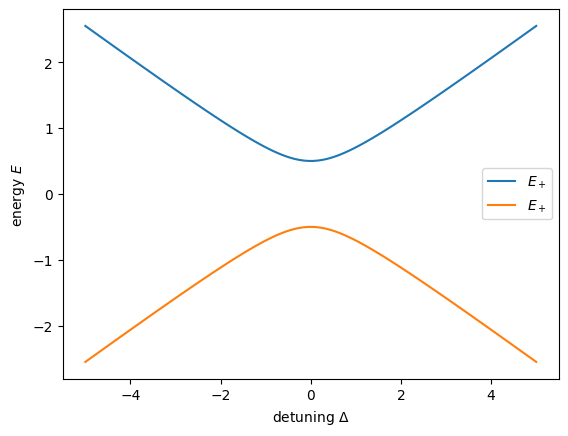

In [3]:
import matplotlib.pyplot as plt
import numpy as np

deltaMax = 5
delta = np.linspace(-deltaMax, deltaMax, 100)
omega = 1

Eplus = np.sqrt(delta**2+omega**2)/2
Eminus = -np.sqrt(delta**2+omega**2)/2

f, ax = plt.subplots()
ax.plot(delta, Eplus, label="$E_+$")
ax.plot(delta, Eminus, label="$E_+$")
ax.legend()
ax.set_xlabel("detuning $\Delta$")
ax.set_ylabel("energy $E$");


The Eigenstates then read:

$$
|\psi_+\rangle =\cos\left(\frac{\theta}{2}\right) e^{-i{\varphi}/{2}}|0\rangle+\sin\left(\frac{\theta}{2}\right) e^{i{\varphi}/{2}}|1\rangle
$$

$$
|\psi_-\rangle =-\sin\left(\frac{\theta}{2}\right)e^{-i{\varphi}/{2}}|0\rangle+\cos\left(\frac{\theta}{2}\right) e^{i{\varphi}/{2}}|1\rangle
$$

where 

$$
\tan(\theta) = \frac{|\Omega|}{\Delta} 
$$


## Dynamical Aspects

After the static case we now want to investigate the dynamical properties of the two-state system. We calculate the time evolution of $|\psi(t)\rangle = c_0(t)|0\rangle + c_1(t)|1\rangle$ with the Schrödinger equation and the perturbed Hamiltonian :

$$
i\hbar \frac{d}{dt}|\psi(t)\rangle=\hat{H}|\psi(t)\rangle,
$$

$$
i \frac{d}{dt}\left(\begin{array}{c} c_0(t) \\ c_1(t) \end{array}\right) = \frac{1}{2}\left( \begin{array}{cc} \Delta & \Omega \\ \Omega^* & -\Delta \end{array} \right) \left(\begin{array}{c} c_0(t) \\ c_1(t) \end{array} \right).
$$

We have two coupled differential equations and we luckily already know how to solve them as we have calculated the two eigenenergies in the previous section. For the state $|\psi(t)\rangle$ we get

$$
 |\psi(t)\rangle=\lambda e^{-i{E_+}t/{\hbar}} |\psi_+\rangle + \mu e^{-i{E_-}t/{\hbar}} |\psi_-\rangle 
$$

with the factors $\lambda$ and $\mu$, which are defined by the initial state. The most common question is then what happens to the system if we start out in the bare state $|0\rangle$ and then let it evolve under coupling with a laser ? So what is the probability to find it in the other state $|1\rangle$:

$$
P_1(t)=\left|\langle 1|\psi(t)\rangle\right|^2.
$$

As a first step, we have to apply the initial condition  and express $|\psi(0)\rangle$ in terms of $|\psi_{\pm}\rangle$:

$$
|\psi(0)\rangle \overset{!}{=} |0\rangle
$$

$$
  =  e^{i{\varphi}/{2}} \left[ \cos\left( \frac{\theta}{2}\right) |\psi_{+}\rangle-\sin\left(\frac{\theta}{2}\right)|\psi_{-}\rangle\right]
$$

By equating the coefficients we get for $\lambda$ and $\mu$:

$$
\lambda = e^{i{\varphi}/{2}}\cos\left(\frac{\theta}{2}\right), \qquad  \mu = -e^{i{\varphi}/{2}}\sin\left(\frac{\theta}{2}\right).
$$

One thus gets:

$$
 P_1(t)= \left|e^{i\varphi} \sin\left(\frac{\theta}{2}\right)\cos\left(\frac{\theta}{2}\right)\left[e^{-i{E_+}t/{\hbar}} - e^{-i{E_-}t/{\hbar}}\right]\right|^2
$$ 

$$
= \sin^2(\theta)\sin^2\left(\frac{E_+-E_-}{2\hbar}t\right)
$$
$P_1(t)$ can be expressed with $\Delta$ and $\Omega$ alone. The obtained relation is called Rabi's formula:

$$
 P_1(t)=\frac{1}{1+\left(\frac{\Delta}{|\Omega|}\right)^2}\sin^2\left(\sqrt{|\Omega|^2+\Delta^2}\frac{t}{2}\right)
$$

Text(0, 0.5, 'probability $P_1$')

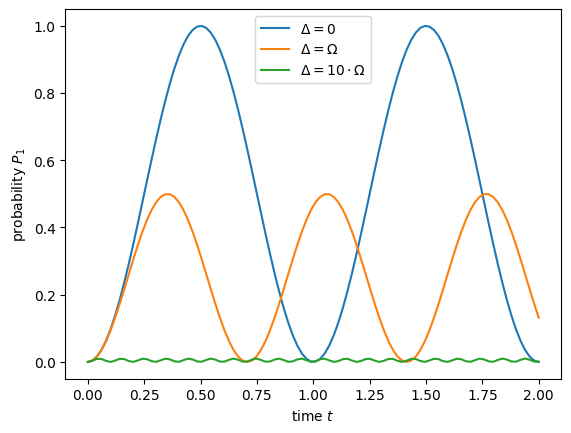

In [4]:
def rabi_osc(time: float, omega: float, delta: float) -> float:
  """
  time evolution in the Rabi oscillation

  Args:
    time: time at which we measure
    omega: coupling strength
    delta: detuning
  
  Returns:
    float: probability to be in the excited state
  """
  return 1/(1+(delta/omega)**2)*np.sin(np.sqrt(omega**2+delta**2)*time/2)**2


omega = 2*np.pi*1
time = np.linspace(0,2, 100)



delta = 0

f, ax = plt.subplots()
ax.plot(time, rabi_osc(time, omega, 0), label = "$\Delta = 0$")
ax.plot(time, rabi_osc(time, omega, omega), label = "$\Delta = \Omega$")
ax.plot(time, rabi_osc(time, omega, 10*omega), label = "$\Delta = 10\cdot\Omega$")
ax.legend()
ax.set_xlabel("time $t$")
ax.set_ylabel("probability $P_1$")

A few key words concerning Rabi oscillations are in order:

- The probability to be in the excited state is indeed maximal if there is zero detuning. 
- The speed of the oscillations get higher with higher detuning. This fact is often overlooked at first sight but key in approximations like the *rotating wave approximation*.

## A few words on the quantum information notation

The qubit is THE basic ingredient of quantum computers. However, you will typically not find Pauli matrices and other common notations of two-state systems in the platforms. The typical notation there is:

-  $R_x(\phi)$ is a rotation around the x-axis for an angle $\phi$.
- Same holds for $R_y$ and $R_z$.
- $X$ denotes the rotation around the x axis for an angle $\pi$. So it transforms $|1\rangle$ into  $|0\rangle$ and vise versa.
- $Z$ denotes the rotation around the x axis for an angle $\pi$. So it transforms $|+\rangle$ into  $|-\rangle$ and vise versa.

The most commonly used gate is actually one that we did not talk about at all, it is the Hadamard gate, which transforms $|1\rangle$ into  $|-\rangle$ and $|0\rangle$ into  $|+\rangle$:

$$
\hat{H}|1\rangle = |-\rangle
$$

$$
\hat{H}|0\rangle = |+\rangle
$$

$$
\hat{H}|-\rangle = |1\rangle 
$$

$$
\hat{H}|+\rangle = |0\rangle
$$

In the next tutorial we will see how these concepts are implemented in real hardware.